<a href="https://colab.research.google.com/github/hanglee1711/hanglee1711-Nutrition-facts-for-Starbucks-Menu/blob/main/Nutrition_facts_for_Starbucks_Menu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#**Import Dataset**

In [ ]:
# Import dataset
drink = pd.read_csv('menu-nutrition-drink.csv')
drink.head(5)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [ ]:
food = pd.read_csv('menu-nutrition-food.csv')
food.head(5)

,Unnamed: 0,Calories,Fat,Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5000.0 mg,50,3,12
1,8-Grain Roll,380,6000.0 mg,70,7,10
2,Almond Croissant,410,22000.0 mg,45,3,10
3,Apple Fritter,460,23000.0 mg,56,2,7
4,Banana Nut Bread,420,22000.0 mg,52,2,6


#**Data Understanding & Pre-processing**

###**DRINK**

In [ ]:
drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

There are many columns containing spaces. We need to remove them.

In [ ]:
drink.columns = drink.columns.str.strip()
drink.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

Rename the columns

In [ ]:
drink.rename(columns = {'Beverage_category':'Beverage Category',
                                       'Beverage_prep':'Beverage Prep'}, inplace = True)
drink.columns

Index(['Beverage Category', 'Beverage', 'Beverage Prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

**Missing values**

In [ ]:
drink.isnull().sum()

,0
Beverage Category,0
Beverage,0
Beverage Prep,0
Calories,0
Total Fat (g),0
Trans Fat (g),0
Saturated Fat (g),0
Sodium (mg),0
Total Carbohydrates (g),0
Cholesterol (mg),0


There is only one missing value in the Caffeine column. Let's find out which row has the null value

In [ ]:
e = drink[drink['Caffeine (mg)'].isnull()]
e

,Beverage Category,Beverage,Beverage Prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN


Based on this link below:
https://www.starbucks.com/menu/product/482/iced?parent=%2Fdrinks%2Fcold-coffees%2Ficed-coffees

 We assumed the caffeine content of the drink is 125(mg).
So, we fill this null value in the 158th row by 125

In [ ]:
drink = drink.fillna(125)
drink.iloc[158]

,158
Beverage Category,Shaken Iced Beverages
Beverage,Iced Brewed Coffee (With Milk & Classic Syrup)
Beverage Prep,2% Milk
Calories,90
Total Fat (g),1
Trans Fat (g),0.5
Saturated Fat (g),0.0
Sodium (mg),5
Total Carbohydrates (g),25
Cholesterol (mg),18


In [ ]:
# Check again
drink.isnull().sum()

,0
Beverage Category,0
Beverage,0
Beverage Prep,0
Calories,0
Total Fat (g),0
Trans Fat (g),0
Saturated Fat (g),0
Sodium (mg),0
Total Carbohydrates (g),0
Cholesterol (mg),0


Now we need to check the data type for each column

In [ ]:
drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage Category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage Prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [ ]:
drink.head(4)

,Beverage Category,Beverage,Beverage Prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410


There are somes columns that have unproper types. We need to check detailedly

**Total Fat (g)**

In [ ]:
# Type of Total Fat (g)
drink['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2', '3. 5'], dtype=object)

Before converting them in to float-type, we need to change '3 2' and '3. 5'.

In [ ]:
drink[drink['Total Fat (g)'] == '3. 5']

,Beverage Category,Beverage,Beverage Prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3. 5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0


In [ ]:
# Replace 3. 5 to 3.5
drink['Total Fat (g)'] = drink['Total Fat (g)'].replace('3. 5', '3.5')
drink['Total Fat (g)'].iloc[239]

'3.5'

In [ ]:
drink[drink['Total Fat (g)'] == '3 2']

,Beverage Category,Beverage,Beverage Prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0


According to the Starbucks website the Total Fat should between 11 to 17 (g) depending on the size, so let's assume it's 16

In [ ]:
# Change values in the 237th row
drink['Total Fat (g)'] = drink['Total Fat (g)'].str.replace('3 2', '16')
drink['Total Fat (g)'].iloc[237]

'16'

In [ ]:
# Convert into float types
drink['Total Fat (g)'] = drink['Total Fat (g)'].astype(float)

**Vitamin A (% DV)**

In [ ]:
drink['Vitamin A (% DV)'].unique()

array(['0%', '10%', '6%', '15%', '20%', '30%', '25%', '8%', '4%', '2%',
       '50%'], dtype=object)

We would like to remove % and convert into int type

In [ ]:
drink['Vitamin A (% DV)'] = drink['Vitamin A (% DV)'].str.replace('%', '').astype(int)


**Vitamin C (% DV)**

In [ ]:
drink['Vitamin C (% DV)'].unique()

array(['0%', '2%', '4%', '6%', '10%', '15%', '20%', '80%', '100%', '8%'],
      dtype=object)

Remove % and convert into int type

In [ ]:
drink['Vitamin C (% DV)'] = drink['Vitamin C (% DV)'].str.replace('%','').astype(int)


**Calcium (% DV)**

In [ ]:
drink['Calcium (% DV)'].unique()

array(['0%', '2%', '20%', '30%', '40%', '50%', '15%', '25%', '35%', '45%',
       '10%', '60%', '6%', '8%'], dtype=object)

Remove % and convert into int type

In [ ]:
drink['Calcium (% DV)'] = drink['Calcium (% DV)'].str.replace('%','').astype(int)


**Iron (% DV)**

In [ ]:
drink['Iron (% DV)'].unique()

array(['0%', '8%', '15%', '25%', '10%', '20%', '30%', '40%', '50%', '6%',
       '2%', '4%', '0.00%', '6.00%', '8.00%', '10.00%', '15.00%', '35%'],
      dtype=object)

We can see that there are the same values such as 6% and 6.00%,.... We need to remove one of them and convert into int type

In [ ]:
drink['Iron (% DV)'] = drink['Iron (% DV)'].str.replace('%','').astype(float)

**Caffeine (mg)**

In [ ]:
drink['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', 125, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

We can see that the Caffeine column contains 'varies' and 'Varies' values. Let's clarify

In [ ]:
drink[drink['Caffeine (mg)'] == 'Varies']

,Beverage Category,Beverage,Beverage Prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,Varies
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,Varies
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,Varies
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,Varies
167,Shaken Iced Beverages,Shaken Iced Tazo® Tea (With Classic Syrup),Grande,80,0.0,0.0,0.0,0,0,21,0,21,0.0,0,0,0,0.0,Varies
168,Shaken Iced Beverages,Shaken Iced Tazo® Tea (With Classic Syrup),Venti,120,0.0,0.0,0.0,0,0,31,0,31,0.0,0,0,0,0.0,Varies
169,Shaken Iced Beverages,Shaken Iced Tazo® Tea Lemonade (With Classic S...,Tall,100,0.0,0.0,0.0,0,0,25,0,24,0.1,0,10,0,0.0,Varies
170,Shaken Iced Beverages,Shaken Iced Tazo® Tea Lemonade (With Classic S...,Grande,130,0.0,0.0,0.0,0,0,33,0,33,0.1,0,15,0,0.0,Varies
171,Shaken Iced Beverages,Shaken Iced Tazo® Tea Lemonade (With Classic S...,Venti,190,0.0,0.0,0.0,0,0,49,0,49,0.1,0,20,0,0.0,Varies
172,Smoothies,Banana Chocolate Smoothie,Grande Nonfat Milk,280,2.5,1.5,0.0,5,150,53,7,34,20.0,10,15,20,0.0,Varies


We will assume the caffeine content for the same beverage category is constant.

(Tazo® Tea Drinks = 10, Shaken Iced Beverages = 20, Smoothies = 30)

In [ ]:
def caffeine(X):
  if (X['Beverage Category']  == 'Tazo® Tea Drinks') and (X['Caffeine (mg)'] == 'Varies') :
    return 10
  elif X['Beverage Category']  == 'Shaken Iced Beverages' and (X['Caffeine (mg)'] == 'Varies'):
    return 20
  elif X['Beverage Category']  == 'Smoothies' and (X['Caffeine (mg)'] == 'Varies'):
    return 30
  else:
    return X['Caffeine (mg)']

drink['Caffeine (mg)'] = drink.apply(caffeine, axis = 1)

In [ ]:
drink[drink['Caffeine (mg)'] == 'varies']

,Beverage Category,Beverage,Beverage Prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
130,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Short Nonfat Milk,80,0.1,0.1,0.0,0,45,16,0,16,4.0,6,0,10,0.0,varies
131,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,90,2.0,1.0,0.1,10,50,15,0,15,3.0,6,0,10,0.0,varies
132,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,80,1.5,0.2,0.0,0,40,14,0,13,3.0,4,0,10,6.0,varies
133,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Tall Nonfat Milk,120,0.1,0.1,0.0,5,65,23,0,23,5.0,10,0,20,0.0,varies
134,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,140,3.0,1.5,0.1,15,75,23,0,23,5.0,8,0,15,0.0,varies
135,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,130,2.5,0.3,0.0,0,60,21,1,19,4.0,6,0,20,8.0,varies
136,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Grande Nonfat Milk,150,0.2,0.1,0.0,5,85,31,0,31,7.0,15,0,25,0.0,varies
137,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,190,4.0,2.0,0.1,15,95,31,0,30,7.0,10,0,25,0.0,varies
138,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,170,3.5,0.4,0.0,0,80,27,1,25,6.0,8,0,25,10.0,varies
139,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Venti Nonfat Milk,190,0.2,0.1,0.0,5,110,39,0,39,9.0,15,0,30,0.0,varies


We can see that all of 'varies' value have the same Beverage Category(Tazo® Tea Drinks) and Beverage (Tazo® Full-Leaf Tea Latte	). Based on Starbucks website, we assume it's 50

In [ ]:
# Replace 'varies' by '50' and Convert into int type
drink['Caffeine (mg)'].replace('varies', '50', inplace=True)
drink['Caffeine (mg)'] = drink['Caffeine (mg)'].astype(int)

**Check again**

In [ ]:
drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage Category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage Prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    float64
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    int64  
 14  Vitamin C (% DV)         2

**Duplicate**

In [ ]:
drink.duplicated().sum()

0

There are no duplicates

###**FOOD**

In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    113 non-null    object
 1    Calories     113 non-null    int64 
 2    Fat          113 non-null    object
 3    Carb. (g)    113 non-null    int64 
 4    Fiber (g)    113 non-null    int64 
 5    Protein (g)  113 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 5.4+ KB


Rename for columns

In [ ]:
food.rename(columns = {'Unnamed: 0': 'Food Name'}, inplace = True)
food.columns

Index(['Food Name', ' Calories', ' Fat', ' Carb. (g)', ' Fiber (g)',
       ' Protein (g)'],
      dtype='object')

Looking at our columns for the first dataset, we can see that they are named inconsistently with odd whitespace before and after name.

In [ ]:
food.columns = food.columns.str.strip()
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Food Name    113 non-null    object
 1   Calories     113 non-null    int64 
 2   Fat          113 non-null    object
 3   Carb. (g)    113 non-null    int64 
 4   Fiber (g)    113 non-null    int64 
 5   Protein (g)  113 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 5.4+ KB


In [ ]:
food.value_counts()

,,,,,,count
Food Name,Calories,Fat,Carb. (g),Fiber (g),Protein (g),
8-Grain Roll,380,6000.0 mg,70,7,10,1
Herbed Chicken & Fig Spread Small Sandwich,300,8000.0 mg,43,2,19,1
Reduced-Fat Turkey Bacon & Cage Free Egg White Breakfast Sandwich,230,6000.0 mg,28,2,16,1
Reduced-Fat Cinnamon Swirl Coffee Cake,370,9000.0 mg,67,2,5,1
Raspberry Whoopie Pie,360,18000.0 mg,45,1,3,1
...,...,...,...,...,...,...
Classic Coffee Cake,390,16000.0 mg,57,1,5,1
Cinnamon Raisin Bagel,270,1000.0 mg,58,3,9,1
Cinnamon Morning Bun,390,15000.0 mg,56,2,8,1


**Fat**

We can see that the 'Fat' column displays fat values in milligrams (mg) instead of grams (g)

In [ ]:
food['Fat'].unique()

array(['5000.0 mg', '6000.0 mg', '22000.0 mg', '23000.0 mg', '16000.0 mg',
       '17000.0 mg', '12000.0 mg', '15000.0 mg', '21000.0 mg',
       '18000.0 mg', '24000.0 mg', '1000.0 mg', '28000.0 mg', '3500.0 mg',
       '3000.0 mg', '8000.0 mg', '14000.0 mg', '20000.0 mg', '10000.0 mg',
       '4000.0 mg', '27000.0 mg', '4500.0 mg', '1500.0 mg', '9000.0 mg',
       '13000.0 mg', '25000.0 mg', '29000.0 mg', '37000.0 mg',
       '7000.0 mg', '26000.0 mg', '32000.0 mg', '19000.0 mg', '2500.0 mg',
       '30000.0 mg', '0.0 mg'], dtype=object)

In [ ]:
# Remove 'mg'
food['Fat'] = food['Fat'].str.replace('mg','').astype(float)
# Change type of column
# Change the unit of columns
food['Fat'].apply(lambda x: x/1000)

,Fat
0,5.0
1,6.0
2,22.0
3,23.0
4,22.0
...,...
108,14.0
109,18.0
110,13.0
111,8.0


**Missing values**

In [ ]:
food.isnull().sum()

,0
Food Name,0
Calories,0
Fat,0
Carb. (g),0
Fiber (g),0
Protein (g),0


There are no missing values

**Duplicate**

In [ ]:
food.duplicated().sum()

0

There are no duplicates

#**EDA**

###**Drink**

**General information**

How many different beverage types are in the dataset?

In [ ]:
drink['Beverage'].unique()

array(['Brewed Coffee', 'Caffè Latte',
       'Caffè Mocha (Without Whipped Cream)',
       'Vanilla Latte (Or Other Flavoured Latte)', 'Caffè Americano',
       'Cappuccino', 'Espresso', 'Skinny Latte (Any Flavour)',
       'Caramel Macchiato',
       'White Chocolate Mocha (Without Whipped Cream)',
       'Hot Chocolate (Without Whipped Cream)',
       'Caramel Apple Spice (Without Whipped Cream)', 'Tazo® Tea',
       'Tazo® Chai Tea Latte', 'Tazo® Green Tea Latte',
       'Tazo® Full-Leaf Tea Latte',
       'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)',
       'Iced Brewed Coffee (With Classic Syrup)',
       'Iced Brewed Coffee (With Milk & Classic Syrup)',
       'Shaken Iced Tazo® Tea (With Classic Syrup)',
       'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)',
       'Banana Chocolate Smoothie', 'Orange Mango Banana Smoothie',
       'Strawberry Banana Smoothie', 'Coffee',
       'Mocha (Without Whipped Cream)', 'Caramel (Without Whipped Cream)',
       'Java Chip (Wi

Which beverages are the most popular within each category?

In [ ]:
drink.groupby('Beverage Category') ['Beverage'].max()

,Beverage
Beverage Category,
Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte)
Coffee,Brewed Coffee
Frappuccino® Blended Coffee,Mocha (Without Whipped Cream)
Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream)
Frappuccino® Light Blended Coffee,Mocha
Shaken Iced Beverages,Shaken Iced Tazo® Tea Lemonade (With Classic S...
Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream)
Smoothies,Strawberry Banana Smoothie
Tazo® Tea Drinks,Tazo® Tea


**Nutritional Analysis**

In [ ]:
drink.describe(include = 'number')

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,2.957851,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512,9.830579,3.648760,20.756198,7.446281,84.710744
std,102.863303,3.062306,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659,8.097962,14.421794,14.542343,10.486467,63.791991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.200000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000,4.000000,0.000000,10.000000,0.000000,30.000000
50%,185.000000,2.500000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000,8.000000,0.000000,20.000000,2.000000,75.000000
75%,260.000000,4.500000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000,15.000000,0.000000,30.000000,10.000000,130.000000
max,510.000000,16.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000,50.000000,100.000000,60.000000,50.000000,410.000000


**Calories**
- The average calorie content is relatively low, but the maximum indicates that some beverages can be quite high in calories, likely those with added syrups or whipped cream.

**Total Fat**
- The average total fat is low. However, the maximum value suggests that some drinks can be significantly higher in fat, possibly due to ingredients like whole milk or cream.

**Trans Fat**
- While many drinks have low or no trans fat, the presence of drinks with up to 9 g indicates that some options may contain unhealthy fats.

**Saturated Fat**
- The very low mean and maximum values suggest that most beverages are low in saturated fat, which is beneficial for heart health. This aligns with a trend towards lighter, less fatty drink options.

**Sodium**
- Sodium levels are generally low, which is a positive aspect for consumers monitoring their sodium intake. The maximum value of 40 mg is relatively low compared to processed foods, making these drinks a better choice in this regard.

**Total Carbohydrates**
- The average carbohydrate content is significant, indicating that many drinks are high in sugars or syrups. This could be a concern for those managing blood sugar levels or following a low-carb diet.

**Cholesterol**
- The average cholesterol level suggests that some drinks may contain dairy, which is typically higher in cholesterol. Consumers should be cautious if they are watching their cholesterol intake.

**Dietary Fibre**
- The low average dietary fiber suggests that these drinks do not significantly contribute to fiber intake, which is important for digestive health. Consumers looking for fiber-rich options may need to consider food choices rather than drinks.

**Sugars**
- The average sugar content is quite high, indicating that many beverages are loaded with sugars.

**Protein**
- The protein content is modest. While some beverages may provide protein (like those with added milk or protein powder), the overall contribution to daily protein needs is likely minimal.

**Vitamin A, C, Calcium, Iron**
- These nutritional contant do not have a significant sources in Starbucks' beverages.

**Caffeine**
- The average caffeine content suggests that many drinks are designed to be energizing, though the maximum value is quite high, indicating that some options can provide a significant caffeine boost.

What are the highest and lowest calorie beverages?

In [ ]:
max_calorie = drink.loc[drink['Calories'].idxmax()]
min_calorie = drink.loc[drink['Calories'].idxmin()]
print(f'The highest calorie beverage is: ',max_calorie['Beverage'])
print(f'The lowest calorie beverage is: ',min_calorie['Beverage'])

The highest calorie beverage is:  White Chocolate Mocha (Without Whipped Cream)
The lowest calorie beverage is:  Tazo® Tea


Which beverages have the highest and lowest sugar content?

In [ ]:
max_sugar = drink.loc[drink['Sugars (g)'].idxmax()]
min_sugar = drink.loc[drink['Sugars (g)'].idxmin()]
print(f'The highest sugar beverage is: ',max_sugar['Beverage'])
print(f'The lowest sugar beverage is: ',min_sugar['Beverage'])

The highest sugar beverage is:  Java Chip (Without Whipped Cream)
The lowest sugar beverage is:  Brewed Coffee


What are the beverages with the highest protein content?

In [ ]:
max_protein = drink.loc[drink['Protein (g)'].idxmax()]
min_protein = drink.loc[drink['Protein (g)'].idxmin()]
print(f'The highest protein beverage is: ',max_protein['Beverage'])
print(f'The lowest protein beverage is: ',min_protein['Beverage'])

The highest protein beverage is:  Banana Chocolate Smoothie
The lowest protein beverage is:  Caramel Apple Spice (Without Whipped Cream)


Is there a significant difference in total fat content among the beverages?

In [ ]:
drink.sort_values(by = ['Total Fat (g)'], ascending = False).head(5)

,Beverage Category,Beverage,Beverage Prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,16.0,0.4,0.0,0,250,67,1,64,5.0,6,8,20,10.0,0
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15.0,9.0,0.2,35,330,77,0,74,19.0,20,4,60,2.0,150
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,460,13.0,6.0,0.0,5,290,70,1,64,16.0,15,2,60,20.0,150
81,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,400,11.0,7.0,0.2,25,250,61,0,58,15.0,15,2,45,0.0,150
96,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),2% Milk,380,11.0,6.0,0.3,35,200,63,2,54,17.0,25,2,50,30.0,30


**Group Analysis**

If grouped by Beverage Category, which group has the highest average calorie count?

In [ ]:
drink.groupby('Beverage Category') ['Calories'].mean().idxmax()

'Smoothies'

**Relationship Exploration**

Is there a correlation between numweical variables?

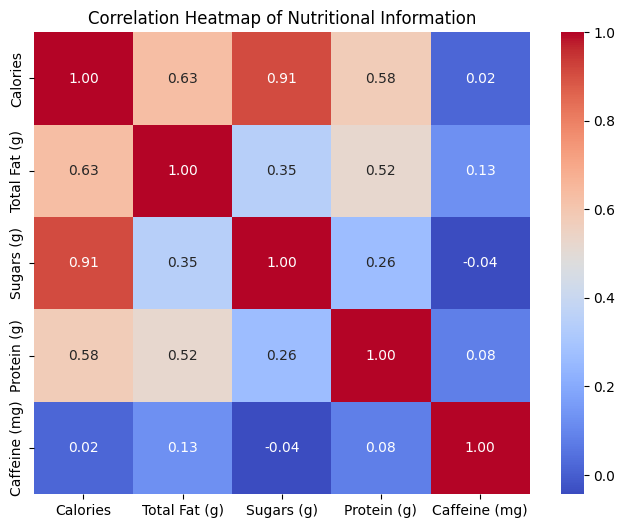

In [ ]:
# Calculate the correlation matrix
correlation_matrix = drink[['Calories', 'Total Fat (g)', 'Sugars (g)', 'Protein (g)', 'Caffeine (mg)']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Nutritional Information')
plt.show()


**Strong correlations**
- Calories and sugar have a very strong correlation (0.91), showing that foods high in sugar often also have a lot of calories.
- Calories and Total Fat have a fairly strong correlation (0.63), which is reasonable because fat contains a lot of calories.

**Noteworthy points**
- The negative correlation between Caffeine and Sugar (-0.04) shows a slight tendency that as caffeine intake increases, sugar intake decreases, although this relationship is very weak.
- Caffeine appears to be independent of other nutritional factors, suggesting it does not significantly affect the overall nutritional value of foods.

Now, we are going to devide this beverage into 2 groups: **'Hot Beverages'** and **'Cold Beverages'**
Before that, we will remove some columns to easily observe nutrients in each group

In [ ]:
new_nutrients = drink.drop(['Trans Fat (g)','Saturated Fat (g)','Sodium (mg)','Total Carbohydrates (g)',
                            'Cholesterol (mg)','Dietary Fibre (g)','Vitamin A (% DV)','Vitamin C (% DV)','Calcium (% DV)','Iron (% DV)'],axis=1)
new_nutrients.head()

,Beverage Category,Beverage,Beverage Prep,Calories,Total Fat (g),Sugars (g),Protein (g),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0,0.3,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0,0.5,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0,1.0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0,1.0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,9,6.0,75


In [ ]:
Hot_drink = new_nutrients.drop(new_nutrients.index[154:]) # index starts from 0, so 154 is actually number 155 so 155 ~ at the end.
Hot_drink.head()

,Beverage Category,Beverage,Beverage Prep,Calories,Total Fat (g),Sugars (g),Protein (g),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0,0.3,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0,0.5,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0,1.0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0,1.0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,9,6.0,75


In [ ]:
Cold_drink = new_nutrients.drop(new_nutrients.index[0:156]) # 0~155
Cold_drink.head()

,Beverage Category,Beverage,Beverage Prep,Calories,Total Fat (g),Sugars (g),Protein (g),Caffeine (mg)
156,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Venti,130,0.1,31,0.4,235
157,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Tall Nonfat Milk,80,0.1,18,2.0,90
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1.0,18,2.0,125
159,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Soymilk,80,1.0,17,2.0,90
160,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Grande Nonfat Milk,110,0.1,24,2.0,90


In [ ]:
calories=pd.DataFrame(drink.groupby('Beverage Category')['Calories'].mean())

colors=['gray']*9
colors[7]='#eb7a34'
colors[6]='blue'
colors[2]='lightpink'
fig = go.Figure(data=[go.Bar(
    x=calories.index,
    y=calories['Calories'],
    marker_color=colors
)])
fig.update_layout(width=700,height=500)
fig.update_xaxes(title='Type')
fig.update_yaxes(title='Avg Calories')
fig.show()

**HOT DRINK ANALYSIS**

Which beverage in hot drink group has the highest average calories?

In [ ]:
calories=pd.DataFrame(Hot_drink.groupby('Beverage')['Calories'].mean())

colors=['gray']*17
colors[16]='#eb7a34'
fig = go.Figure(data=[go.Bar(
    x=calories.index,
    y=calories['Calories'],
    marker_color=colors
)])
fig.update_layout(width=700,height=500)
fig.update_xaxes(title='Hot_drink')
fig.update_yaxes(title='Avg Calories')
fig.show()

Which beverage in hot drink group has the highest average total fat?

In [ ]:
Total_fat=pd.DataFrame(Hot_drink.groupby('Beverage')['Total Fat (g)'].mean())

colors=['gray']*17
colors[16]='#eb7a34'
fig = go.Figure(data=[go.Bar(
    x=Total_fat.index,
    y=Total_fat['Total Fat (g)'],
    marker_color=colors
)])
fig.update_layout(width=700,height=500)
fig.update_xaxes(title='Hot_drink')
fig.update_yaxes(title='Avg Total_fat')
fig.show()

Which beverage in hot drink group has the highest average sugar?

In [ ]:
Sugars=pd.DataFrame(Hot_drink.groupby('Beverage')['Sugars (g)'].mean())

colors=['gray']*17
colors[5]='#eb7a34'
fig = go.Figure(data=[go.Bar(
    x=Sugars.index,
    y=Sugars['Sugars (g)'],
    marker_color=colors
)])
fig.update_layout(width=700,height=500)
fig.update_xaxes(title='Hot_drink')
fig.update_yaxes(title='Avg Sugars')
fig.show()

Which beverage in hot drink group has the highest average protein?

In [ ]:
Protein=pd.DataFrame(Hot_drink.groupby('Beverage')['Protein (g)'].mean())

colors=['gray']*17
colors[16]='#eb7a34'
fig = go.Figure(data=[go.Bar(
    x=Protein.index,
    y=Protein['Protein (g)'],
    marker_color=colors
)])
fig.update_layout(width=700,height=500)
fig.update_xaxes(title='Hot_drink')
fig.update_yaxes(title='Avg Protein')
fig.show()

Which beverage in hot drink group has the highest average caffein?

In [ ]:
Caffeine=pd.DataFrame(Hot_drink.groupby('Beverage')['Caffeine (mg)'].mean())

colors=['gray']*17
colors[0]='#eb7a34'
fig = go.Figure(data=[go.Bar(
    x=Caffeine.index,
    y=Caffeine['Caffeine (mg)'],
    marker_color=colors
)])
fig.update_layout(width=700,height=500)
fig.update_xaxes(title='Hot_drink')
fig.update_yaxes(title='Avg Caffeine')
fig.show()

**COLD DRINK ANALYSIS**

Which beverage in cold drink group has the highest average calories?

In [ ]:
calories=pd.DataFrame(Cold_drink.groupby('Beverage')['Calories'].mean())

colors=['gray']*17
colors[7]='#eb7a34'
fig = go.Figure(data=[go.Bar(
    x=calories.index,
    y=calories['Calories'],
    marker_color=colors
)])
fig.update_layout(width=700,height=500)
fig.update_xaxes(title='Cold_drink')
fig.update_yaxes(title='Avg Calories')
fig.show()

Which beverage in cold drink group has the highest average total fat?

In [ ]:
Total_fat=pd.DataFrame(Cold_drink.groupby('Beverage')['Total Fat (g)'].mean())

colors=['gray']*17
colors[7]='#eb7a34'
fig = go.Figure(data=[go.Bar(
    x=Total_fat.index,
    y=Total_fat['Total Fat (g)'],
    marker_color=colors
)])
fig.update_layout(width=700,height=500)
fig.update_xaxes(title='Cold_drink')
fig.update_yaxes(title='Avg Total_fat')
fig.show()

Which beverage in cold drink group has the highest average sugars?

In [ ]:
Sugars=pd.DataFrame(Cold_drink.groupby('Beverage')['Sugars (g)'].mean())

colors=['gray']*17
colors[7]='#eb7a34'
fig = go.Figure(data=[go.Bar(
    x=Sugars.index,
    y=Sugars['Sugars (g)'],
    marker_color=colors
)])
fig.update_layout(width=700,height=500)
fig.update_xaxes(title='Cold_drink')
fig.update_yaxes(title='Avg Sugars')
fig.show()

Which beverage in cold drink group has the highest average protein?

In [ ]:
Protein=pd.DataFrame(Cold_drink.groupby('Beverage')['Protein (g)'].mean())

colors=['gray']*17
colors[0]='#eb7a34'
fig = go.Figure(data=[go.Bar(
    x=Protein.index,
    y=Protein['Protein (g)'],
    marker_color=colors
)])
fig.update_layout(width=700,height=500)
fig.update_xaxes(title='Cold_drink')
fig.update_yaxes(title='Avg Protein')
fig.show()

Which beverage in cold drink group has the highest average caffeine?

In [ ]:
Caffeine=pd.DataFrame(Cold_drink.groupby('Beverage')['Caffeine (mg)'].mean())

colors=['gray']*17
colors[4]='#eb7a34'
fig = go.Figure(data=[go.Bar(
    x=Caffeine.index,
    y=Caffeine['Caffeine (mg)'],
    marker_color=colors
)])
fig.update_layout(width=700,height=500)
fig.update_xaxes(title='Cold_drink')
fig.update_yaxes(title='Avg Caffeine')
fig.show()

###**FOOD**

**Nutritional Analysis**

Top 10 food item has the highest average contents

Highest Fat: Green Goddess Avocado Salad with 37000.0 Fat
Lowest Fat: Seasonal Fruit Blend with 0.0 Fat

Average Fat content: 16353.98



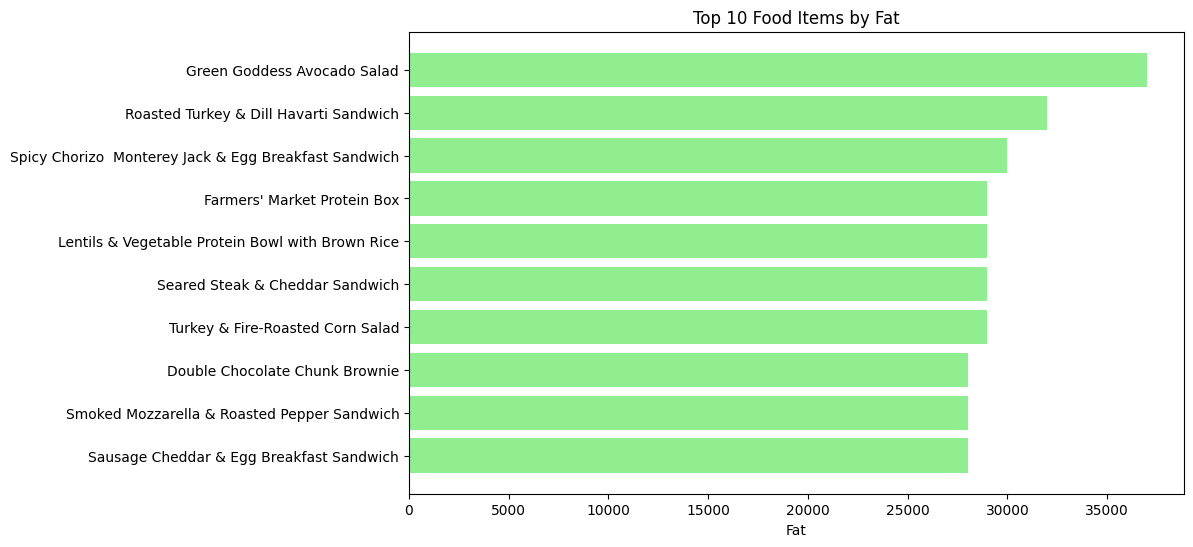

Highest Carb. (g): Strawberries & Jam Sandwich with 80 Carb. (g)
Lowest Carb. (g): Organic Avocado (Spread) with 5 Carb. (g)

Average Carb. (g) content: 41.49



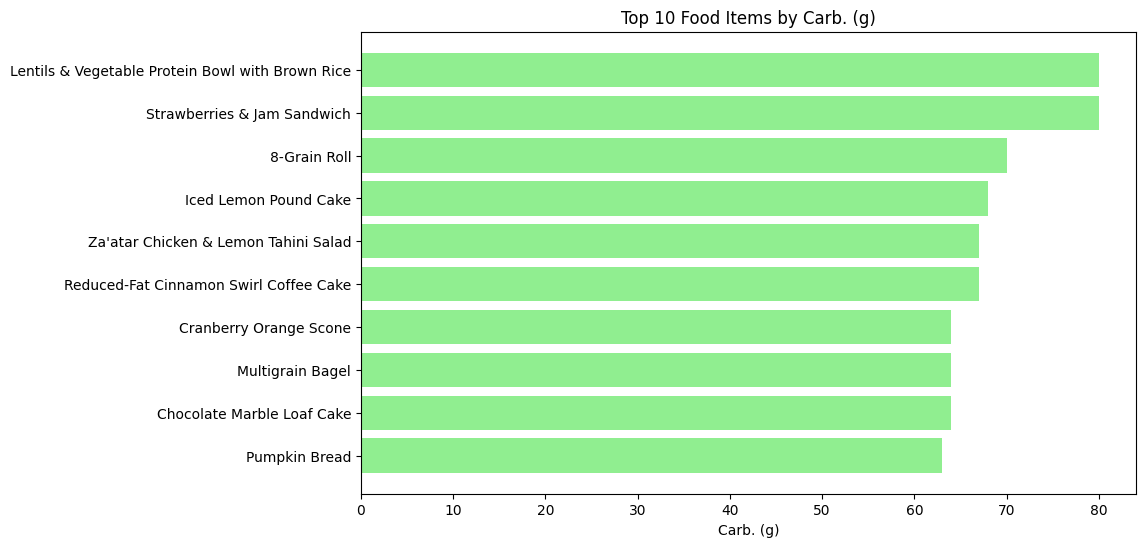

Highest Fiber (g): Lentils & Vegetable Protein Bowl with Brown Rice with 21 Fiber (g)
Lowest Fiber (g): Butterfly Cookie with 0 Fiber (g)

Average Fiber (g) content: 2.85



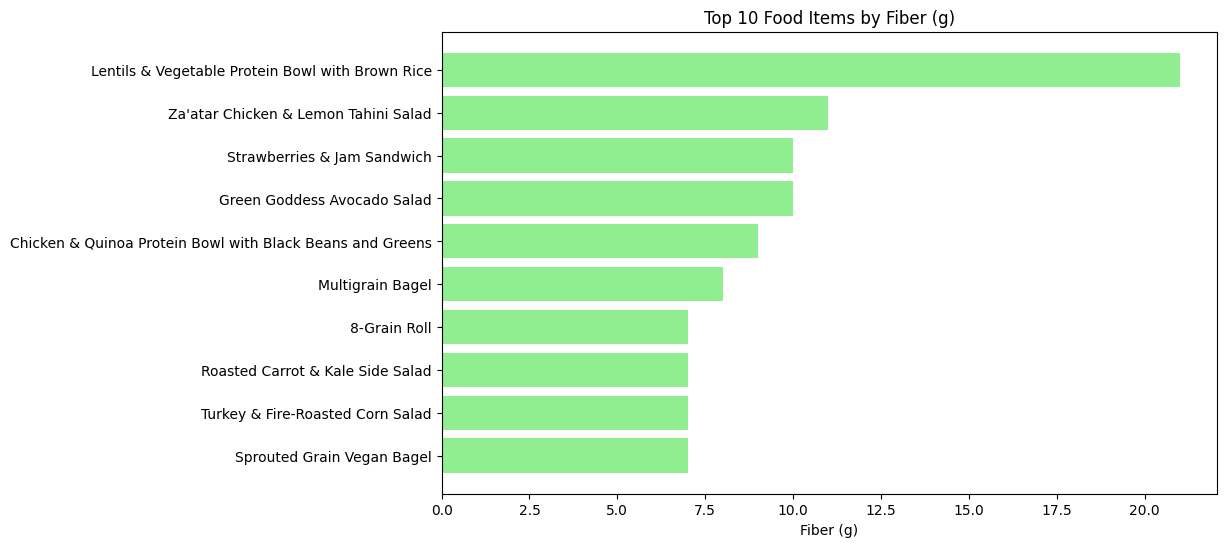

Highest Protein (g): Turkey Pesto Panini with 34 Protein (g)
Lowest Protein (g): Frappuccino® Cookie Straw with 1 Protein (g)

Average Protein (g) content: 11.47



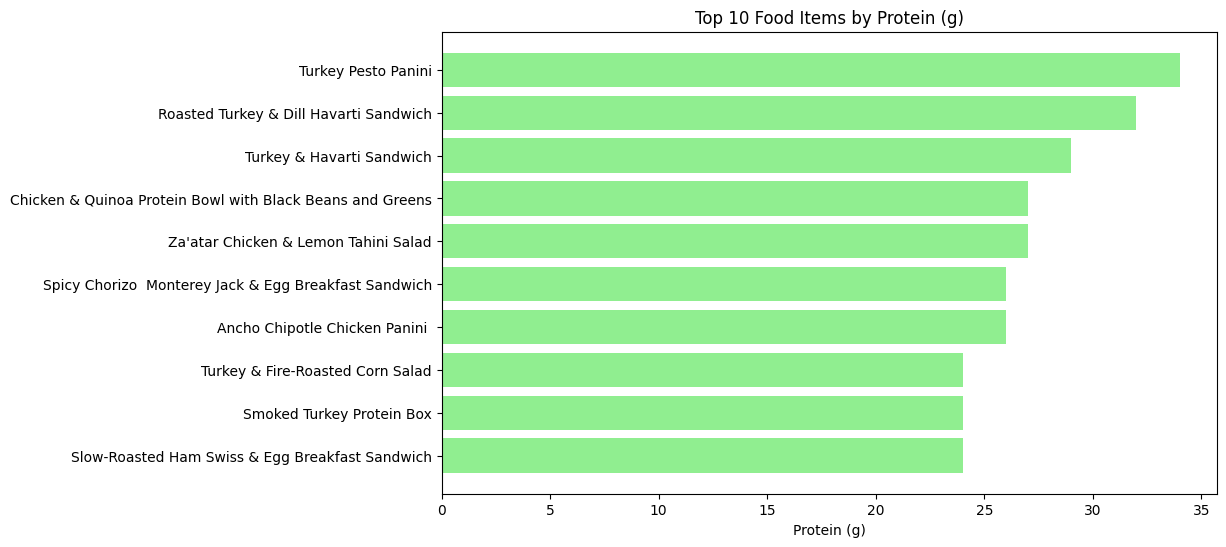

In [ ]:
def analyze_nutrient(nutrient):
    # Highest and lowest values
    highest = food.loc[food[nutrient].idxmax()]
    lowest = food.loc[food[nutrient].idxmin()]

    print(f"Highest {nutrient}: {highest['Food Name']} with {highest[nutrient]} {nutrient}")
    print(f"Lowest {nutrient}: {lowest['Food Name']} with {lowest[nutrient]} {nutrient}\n")

    # Average value
    average = food[nutrient].mean()
    print(f"Average {nutrient} content: {average:.2f}\n")

    # Top 10 items
    top_10 = food[['Food Name', nutrient]].sort_values(by=nutrient, ascending=False).head(10)

    # Create a bar chart for the top 10 items
    plt.figure(figsize=(10, 6))
    plt.barh(top_10['Food Name'], top_10[nutrient], color='lightgreen')
    plt.xlabel(nutrient)
    plt.title(f'Top 10 Food Items by {nutrient}')
    plt.gca().invert_yaxis()  # Invert y axis
    plt.show()

# Analyze each nutrient
analyze_nutrient('Fat')
analyze_nutrient('Carb. (g)')
analyze_nutrient('Fiber (g)')
analyze_nutrient('Protein (g)')


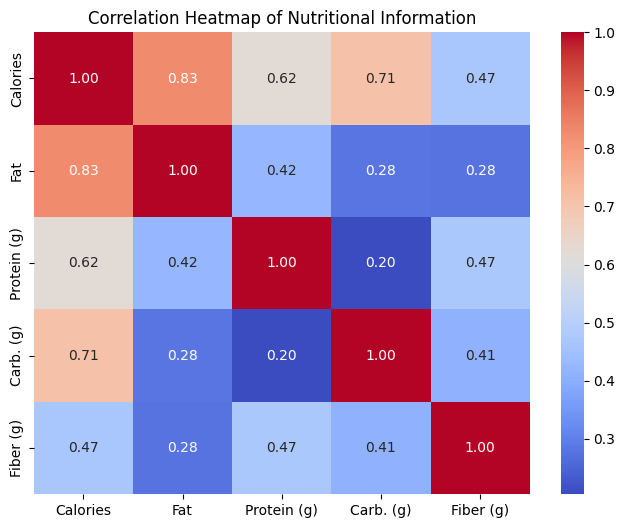

In [ ]:
# Calculate the correlation matrix
correlation_matrix = food[['Calories', 'Fat', 'Protein (g)', 'Carb. (g)', 'Fiber (g)']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Nutritional Information')
plt.show()


- Calories have the strongest correlation with Fat, which suggests that fat contributes significantly to total energy.
- Protein, Carbs. and Fiber are relatively weakly correlated with each other, suggesting diversity in their origins in foods.
- Fat is weakly correlated with parameters other than Calories, which may indicate that the fat content of a food is not necessarily related to the protein, carbohydrate or fiber content.